## Esercitazione 5  del    19 Marzo 2024 


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- Si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [46]:
import sympy as sym
import numpy as np

#da rifare punto 1
p=10.0**5 #metterci sempre 10.0
'''f = lambda i: x**2 + 2*p*x - 10**i
fs = f(np.arange(11))
print(fs)
fq = lambda i: -p + np.sqrt(p**2 + 1/10**i'''
#2, da i = 7 il risultato viene troncato a 0 perchè q < spacing
#K=|x*f'(x)\f(x)|
q = 10.0**(-np.arange(11))
x=-p+np.sqrt(p**2+q)
print('sol=',x)
print('spacing=',np.spacing(p**2))
print('q=',q)
#3 forma stabile
xRaz=(q)/(np.sqrt(p**2+q)+p)
print('stabile=', xRaz)

sol= [4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
spacing= 1.9073486328125e-06
q= [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]
stabile= [5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]


## Esercizio 2
Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

[0.         2.         2.82842712 3.06146746 3.12144515 3.13654849
 3.14033116 3.14127725 3.1415138  3.14157294 3.14158773 3.14159142
 3.14159235 3.14159258 3.14159263 3.14159265 3.14159265 3.14159261
 3.14159291 3.14159413 3.14159655 3.14159655 3.14167427 3.14182968
 3.14245127 3.14245127 3.16227766 3.16227766 3.46410162 4.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[1.0, 0.3633802276324186, 0.09968368384289383, 0.02550464159556715, 0.0064131488557940125, 0.001605606964381162, 0.00040154685032525045, 0.00010039578386326544, 2.509951299941639e-05, 6.274913422618814e-06, 1.568729741775773e-06, 3.921848863793808e-07, 9.80326701348349e-08, 2.4524117944757272e-08, 6.406478208483288e-09, 3.8763653359172195e-10, 2.6319700655609444e-09, 1.471039646217161e-08, 8.19170108940481e-08, 4.684265467399403e-07, 1.2414451701855515e-06, 1.2414451701855515e-06, 2.59777256198812e-05, 7.544845100703004e-05, 0.00027330688571593643, 0.00027330688

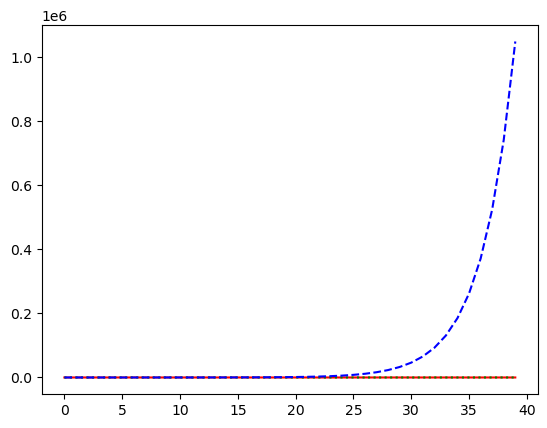

In [108]:
import math
import matplotlib.pyplot as plt
n=40
b=np.zeros((n,))
s=np.zeros((n,))
p=np.zeros((n,))
ps=np.zeros((n,))
b[0]=2
s[0]=1
#n=int(input("scegli:"))
for i in range(1,n):
    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
    s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)
print(p)
e1=[]
for e in p :
    e1.append(math.fabs(math.pi-e)/math.fabs(math.pi)) 
print(e1)

for i in range(1,n):
    ps[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
    s[i]=(s[i-1]*np.sqrt(2))/2.0
e2=[]
for e in ps :
    e2.append(math.fabs(math.pi-e)/math.fabs(math.pi)) 


plt.plot(np.arange(n), p, 'r-', np.arange(n), e1, 'g:',np.arange(n), ps, 'b--')
plt.show()

#stabilizzato -> bisogna cambiare il calcolo di s


## Esercizio 3   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



In [ ]:
n=100
s=np.zeros((20,))
s1=0
k=100
fattK = 
for k in range(n):
    xt= x**k
    kt = 1*kt
    s1=s1+x**k/k

## Esercizio 4
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

## Esercizio 5
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


## Esercizio 6
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?
